In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

# Analysis of Queueing System

In [2]:
df0 = pd.read_csv('MeanCustomersInQueue0.csv', header= None, names = ['Customers 0'])

In [3]:
df0.head()

,Customers 0
0,0.939550
1,0.951477
2,0.954037
3,0.961318
4,0.960556


In [4]:
df1 = pd.read_csv('MeanCustomersInQueue1.csv', header= None, names = ['Customers 1'])

In [5]:
df = df0.join(df1)

In [6]:
df

,Customers 0,Customers 1
0,0.939550,0.961056
1,0.951477,0.944719
2,0.954037,0.959715
3,0.961318,0.935946
4,0.960556,0.943696
...,...,...
95,0.943386,0.965287
96,0.953069,0.964227
97,0.974348,0.949546
98,0.940269,0.972527


In [7]:
df.corr()

,Customers 0,Customers 1
Customers 0,1.000000,-0.206872
Customers 1,-0.206872,1.000000


In [8]:
corr01 = df['Customers 0'].corr(df['Customers 1'])
corr01

-0.20687163161877933

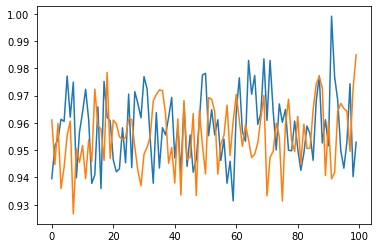

In [9]:
plt.plot(df.index, df['Customers 0'])
plt.plot(df.index, df['Customers 1'])

In [10]:
mean0 = df['Customers 0'].mean()
mean1 = df['Customers 1'].mean()

In [28]:
total = np.append(df['Customers 0'].to_numpy(), df['Customers 1'].to_numpy())

In [34]:
total.std()/math.sqrt(total.size)

0.0008751416838966262

In [11]:
sd0 = df['Customers 0'].std()/math.sqrt(len(df['Customers 0']))
sd1 = df['Customers 1'].std()/math.sqrt(len(df['Customers 1']))

In [12]:
mean = (mean0 + mean1)/2
mean

0.9568727042637794

In [13]:
sd = math.sqrt(1/4 *(sd0**2+sd1**2+2*sd0**1*sd1**2*corr01))
sd

0.000872811498930154